In [6]:
# import libraries
import pandas as pd
import numpy as np

# import for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import for t-test
from scipy import stats

In [3]:
# read a target data
data = pd.read_csv('train_data.csv')

In [4]:
# independent variable 'is_weekend', 'days_of_week', and 'times_of_day'
weekend = np.array(data['is_weekend'])
daysOfWeek = np.array(data['day_of_week'])

# encode 'times_of_day' into numerical order
times = data["times_of_day"].unique()
time_mapping = {'Morning': 1, 'Noon': 2, 'Evening': 3}
times_encoded = data['times_of_day'].map(time_mapping)

# dependent variable 'click_rate'
click_rate = data['click_rate']

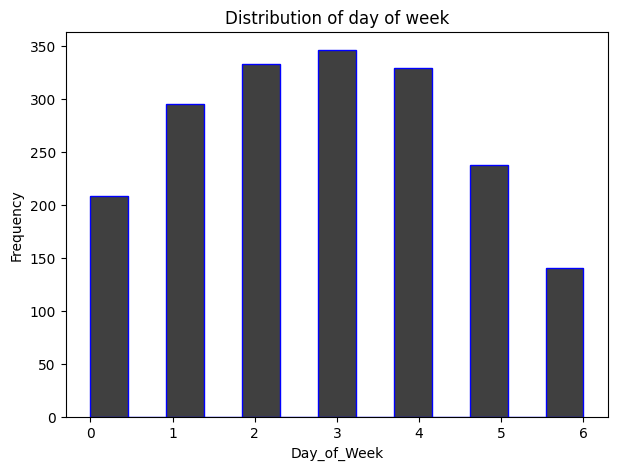

In [11]:
# Visualize each data

# visualize day_of_week in histogram
plt.figure(figsize=(7, 5))
sns.histplot(x='day_of_week', data=data, bins='auto', kde=False, color='black', edgecolor='blue')

plt.xlabel('Day_of_Week')
plt.ylabel('Frequency')
plt.title('Distribution of day of week')
plt.show()

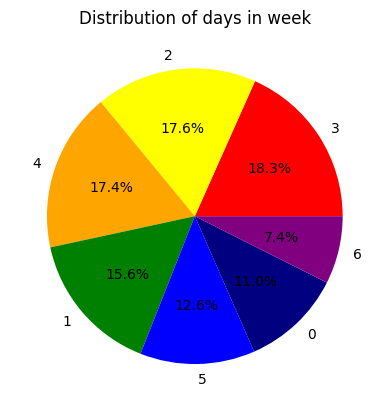

In [14]:
# count each element
value_counts = data['day_of_week'].value_counts()
# count total
total_count = len(data['day_of_week'])

# visualize day_of_week in pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=['red', 'yellow', 'orange', 'green', 'blue', 'navy', 'purple'])
plt.title('Distribution of days in week')
plt.show()

<ipython-input-23-6fb6c6f6e657>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day_of_week', y='click_rate', data=data, ci=None)


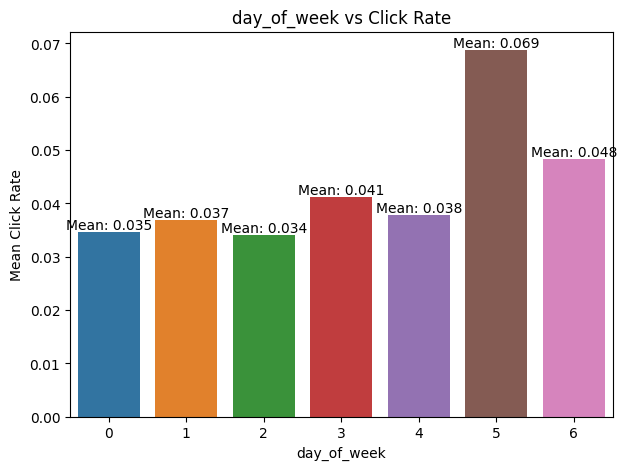

In [23]:
# Bar plot for 'day_of_week' vs 'click_rate'
plt.figure(figsize=(7, 5))
sns.barplot(x='day_of_week', y='click_rate', data=data, ci=None)
mean_click_rate_image = data.groupby('day_of_week')['click_rate'].mean()
for i, mean_rate in enumerate(mean_click_rate_image):
    plt.text(i, mean_rate, f'Mean: {mean_rate:.3f}', ha='center', va='bottom')
plt.title('day_of_week vs Click Rate')
plt.xlabel('day_of_week')
plt.ylabel('Mean Click Rate')
plt.show()

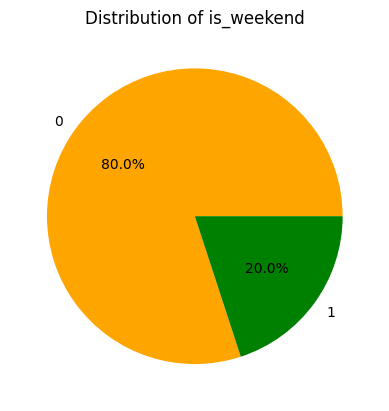

In [15]:
# count each element
value_counts = data['is_weekend'].value_counts()
# count total
total_count = len(data['is_weekend'])

# visualize 'is_weekend' in pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=['orange', 'green'])
plt.title('Distribution of is_weekend')
plt.show()

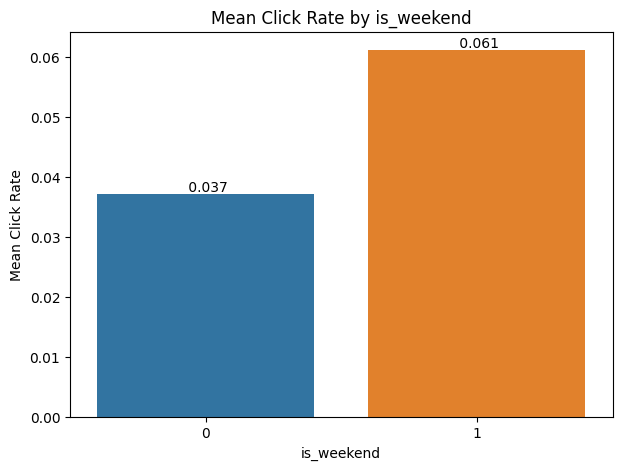

In [27]:
# Visualize 'is_weekend' vs 'click_rate'
plt.figure(figsize=(7, 5))
sns.barplot(x='is_weekend', y='click_rate', data=data, errorbar=None)
mean_click_rate_urgency = data.groupby('is_weekend')['click_rate'].mean()
for i, mean_rate in enumerate(mean_click_rate_urgency):
    plt.text(i, mean_rate, f' {mean_rate:.3f}', ha='center', va='bottom')
plt.title('is_weekend vs Click Rate')
plt.title('Mean Click Rate by is_weekend')
plt.xlabel('is_weekend')
plt.ylabel('Mean Click Rate')

plt.show()

In [16]:
# check every kinds of element in 'times_of_day' column
unique_elements = data['times_of_day'].unique()
unique_elements

array(['Noon', 'Morning', 'Evening'], dtype=object)

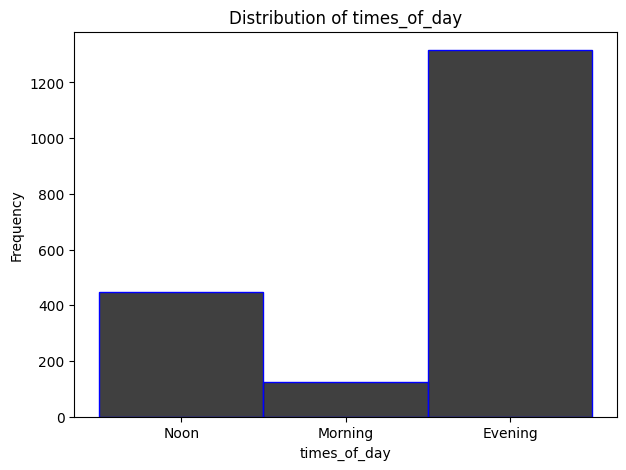

In [17]:
# visualize 'times_of_day' in histogram
plt.figure(figsize=(7, 5))
sns.histplot(x='times_of_day', data=data, bins='auto', kde=False, color='black', edgecolor='blue')

plt.xlabel('times_of_day')
plt.ylabel('Frequency')
plt.title('Distribution of times_of_day')
plt.show()

In [26]:
# evaluate p-value and t statistic by t-test
# t statistic and p value
weekend_t, weekend_p = stats.ttest_ind(weekend, click_rate)
daysOfWeek_t, daysOfWeek_p = stats.ttest_ind(daysOfWeek, click_rate)
times_t, times_p = stats.ttest_ind(times_encoded, click_rate)

print(f"is_weekend:  t-statistic - {weekend_t}, p-value - {weekend_p}")
print(f"days of week:  t-statistic - {daysOfWeek_t}, p-value - {daysOfWeek_p}")
print(f"times of day:  t-statistic - {times_t}, p-value - {times_p}")

is_weekend:  t-statistic - 16.778433177564494, p-value - 5.413031606085736e-61
days of week:  t-statistic - 68.5907688094779, p-value - 0.0
times of day:  t-statistic - 184.70050705243636, p-value - 0.0
